# <center> Scientific Programming with Python
## <center> Final assignment: Life Expectancy

**Author:** Patrick Metz (pmetz2s; 9033945)  
**Date:** June 28th, 2021

### Task 1
**Goal**: use Pandas to import life expectancy data<sup>1</sup> from a given csv 
file into a dataframe, while removing incomplete rows. 

The data spans most years from 1960 to 2018; data sets of the years from 1970 to 1975 and
from 1995 to 1999 are missing. Year columns have data type *float* and the remaining
columns possess *string* type. 

|Country Name|Country Code|Region|Income Group|1960|1961|...|1969|1976|...|1994|2000|...|2018|
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
|Country 1|...|...|...|...|...|...|...|...|...|...|...|...|...|
|Country 2|...|...|...|...|...|...|...|...|...|...|...|...|...|
|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|
|Country n-1|...|...|...|...|...|...|...|...|...|...|...|...|...|
|Country n|...|...|...|...|...|...|...|...|...|...|...|...|...|

**Reference**: 1) Life expectancy at birth, total (years) | Data (2021). Available online 
at https://data.worldbank.org/indicator/SP.DYN.LE00.IN, checked on 6/1/2021.

In [1]:
import warnings
import matplotlib.pyplot as plt, numpy as np, pandas as pd

data_frame = pd.read_csv(
    "life_expectancy_numpy_scipy.csv").dropna()  # only read complete data

### Task 2
**Goal**: Fit a polynomial of the 6th degree to the life expectancy data, of a sample of 
five randomly chosen countries, via Numpy. Then accordingly plot five graphs where the 
fitted polynomial data and the original life expectancy data overlay.

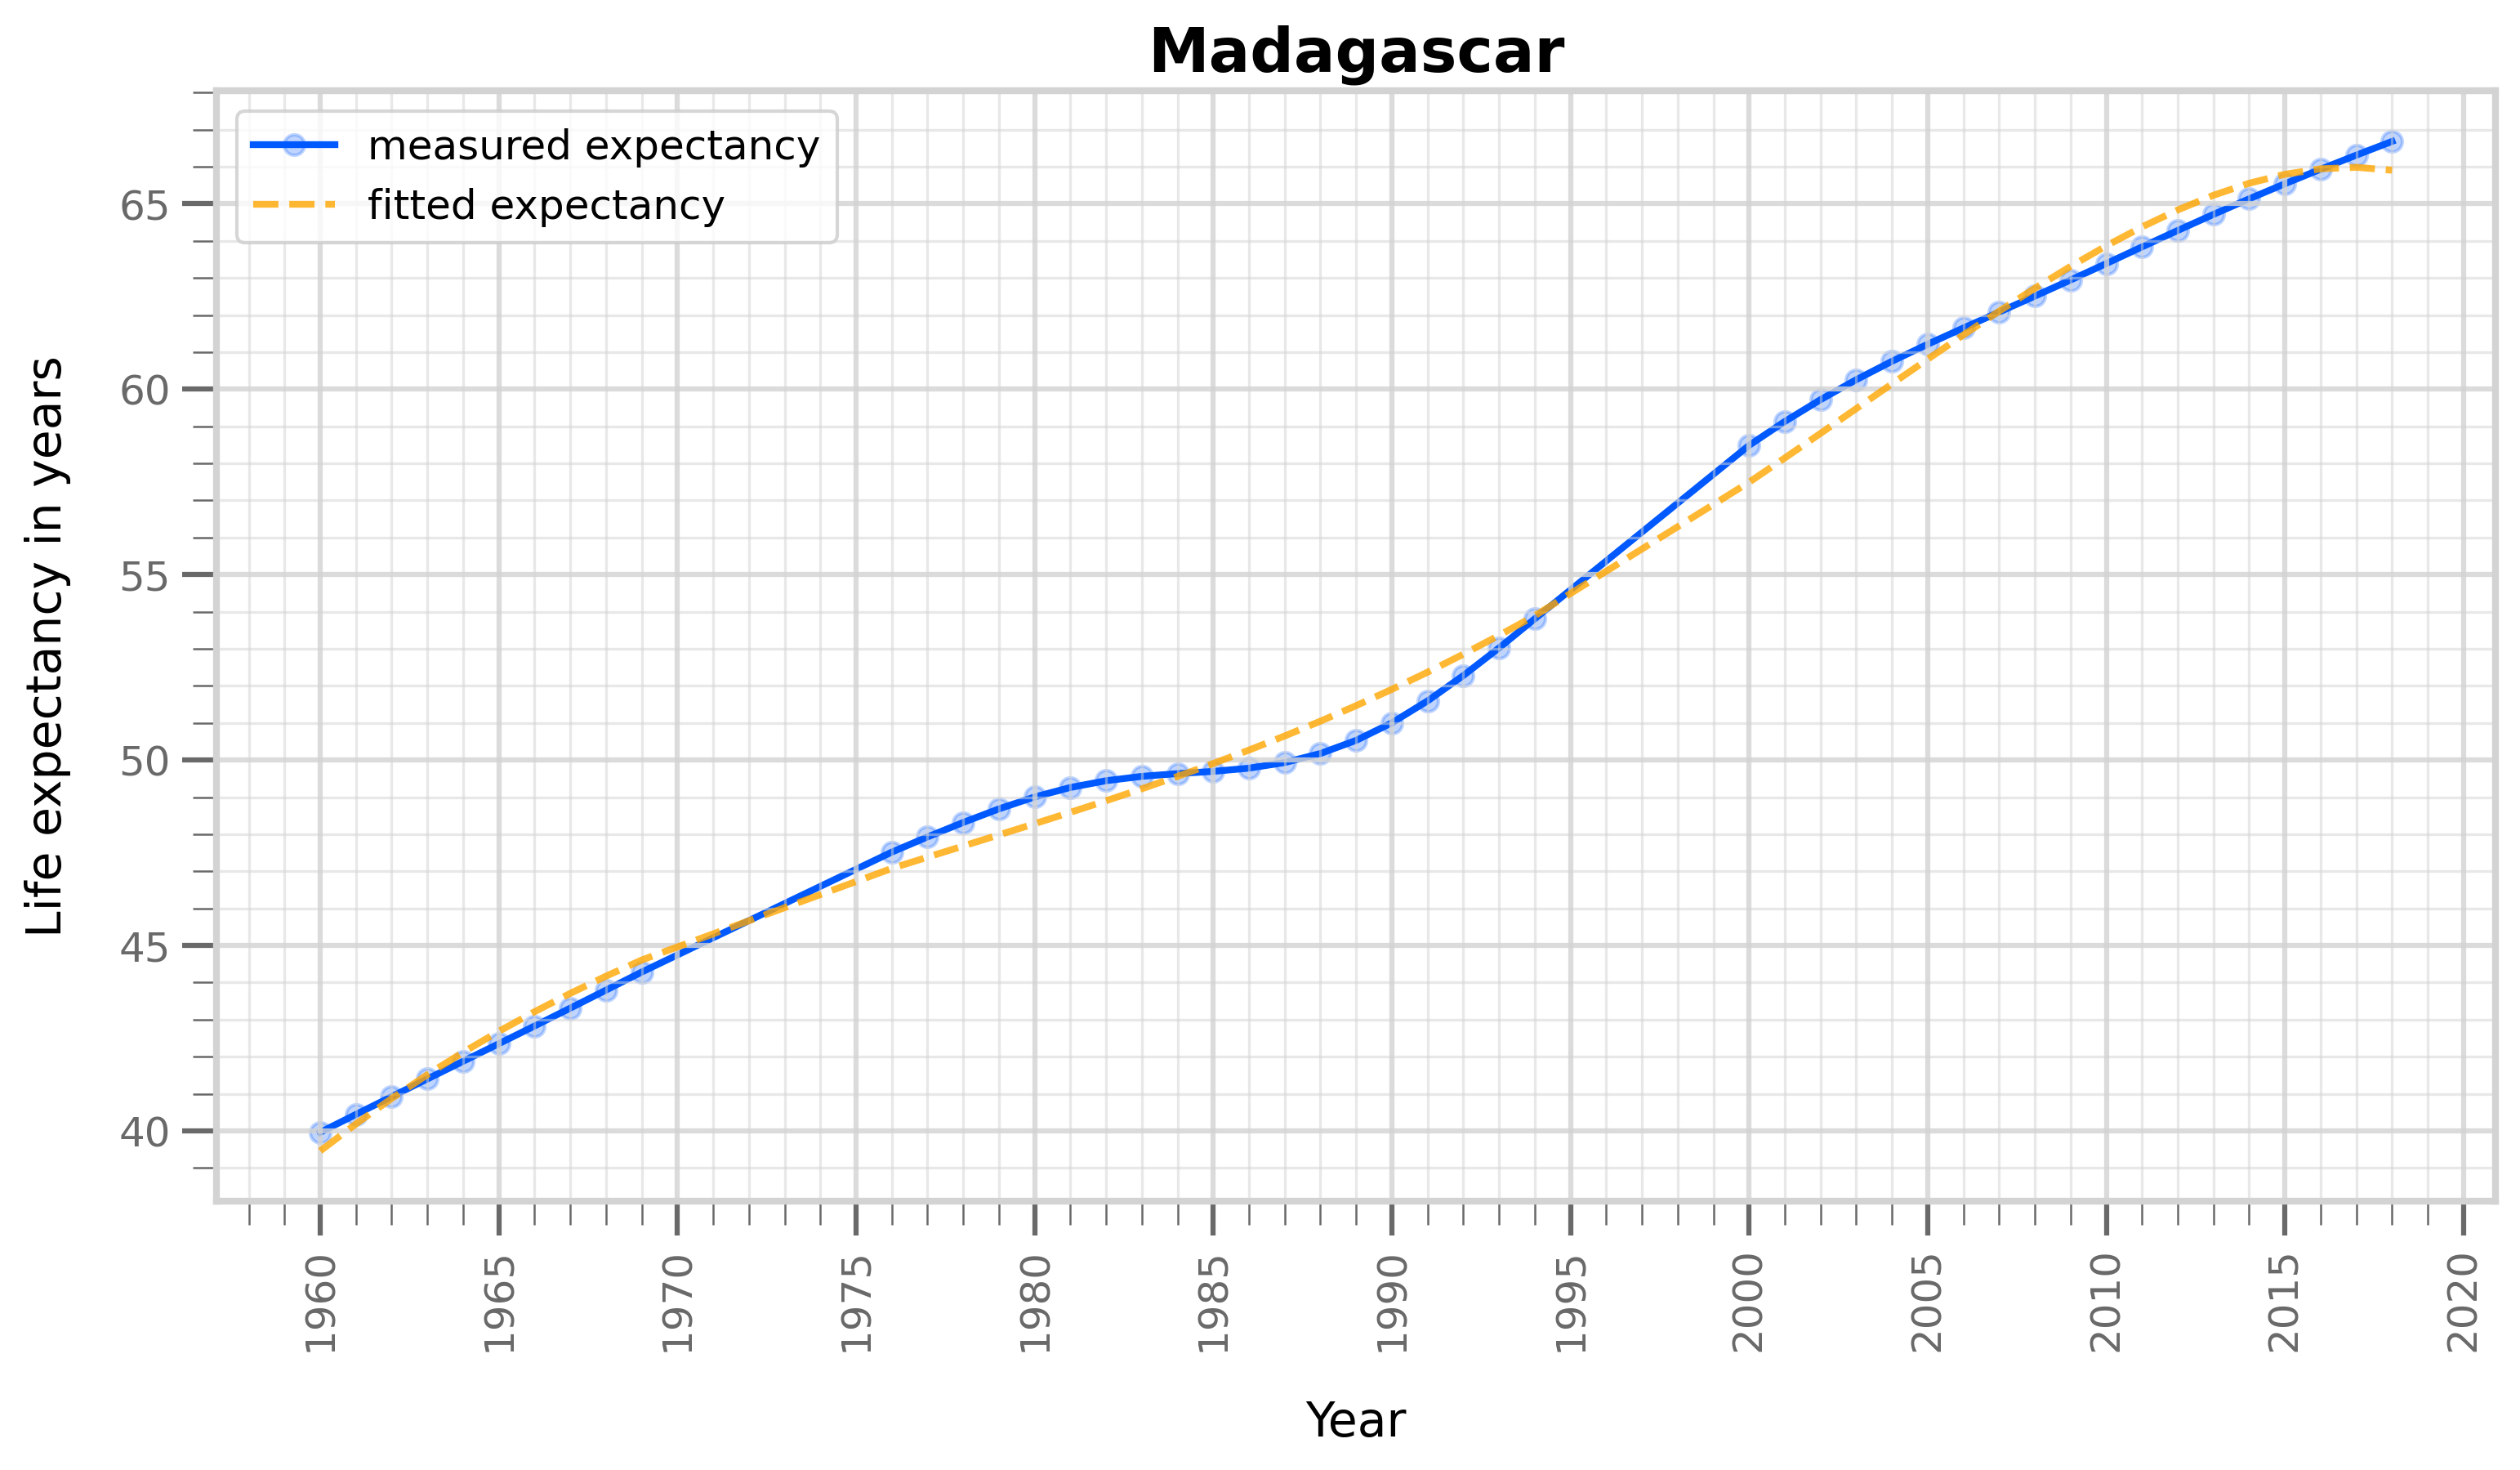

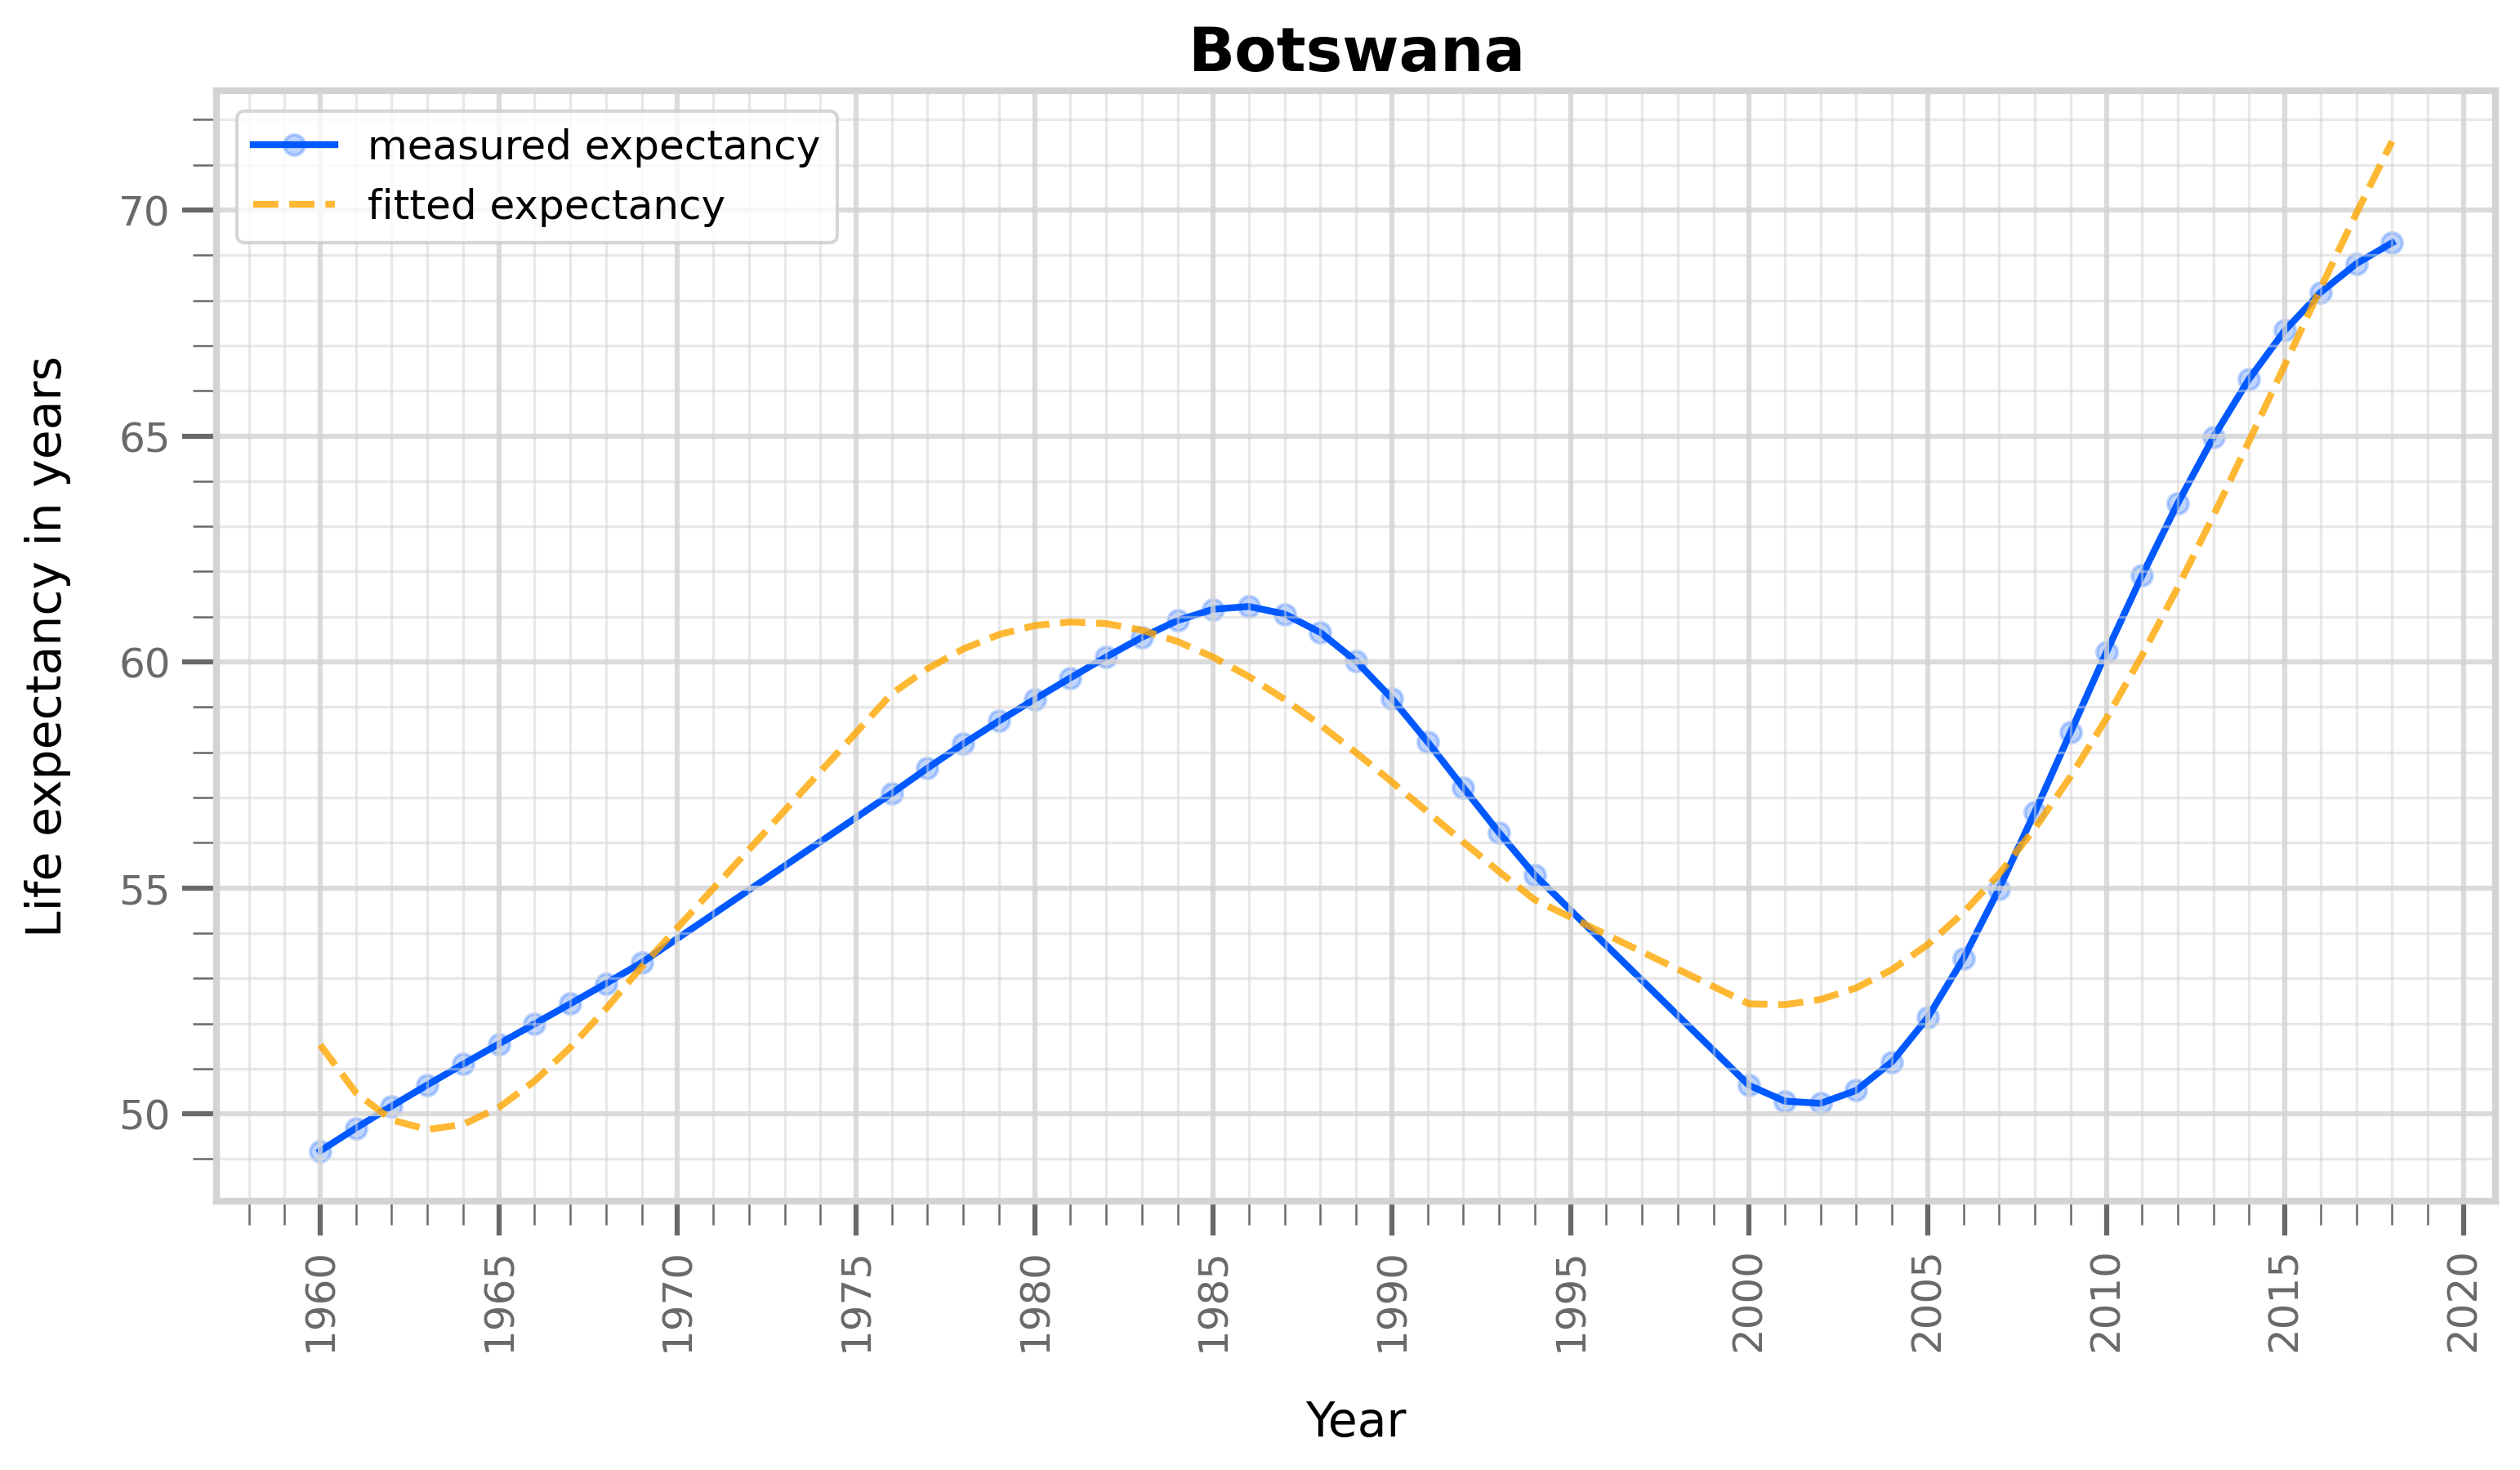

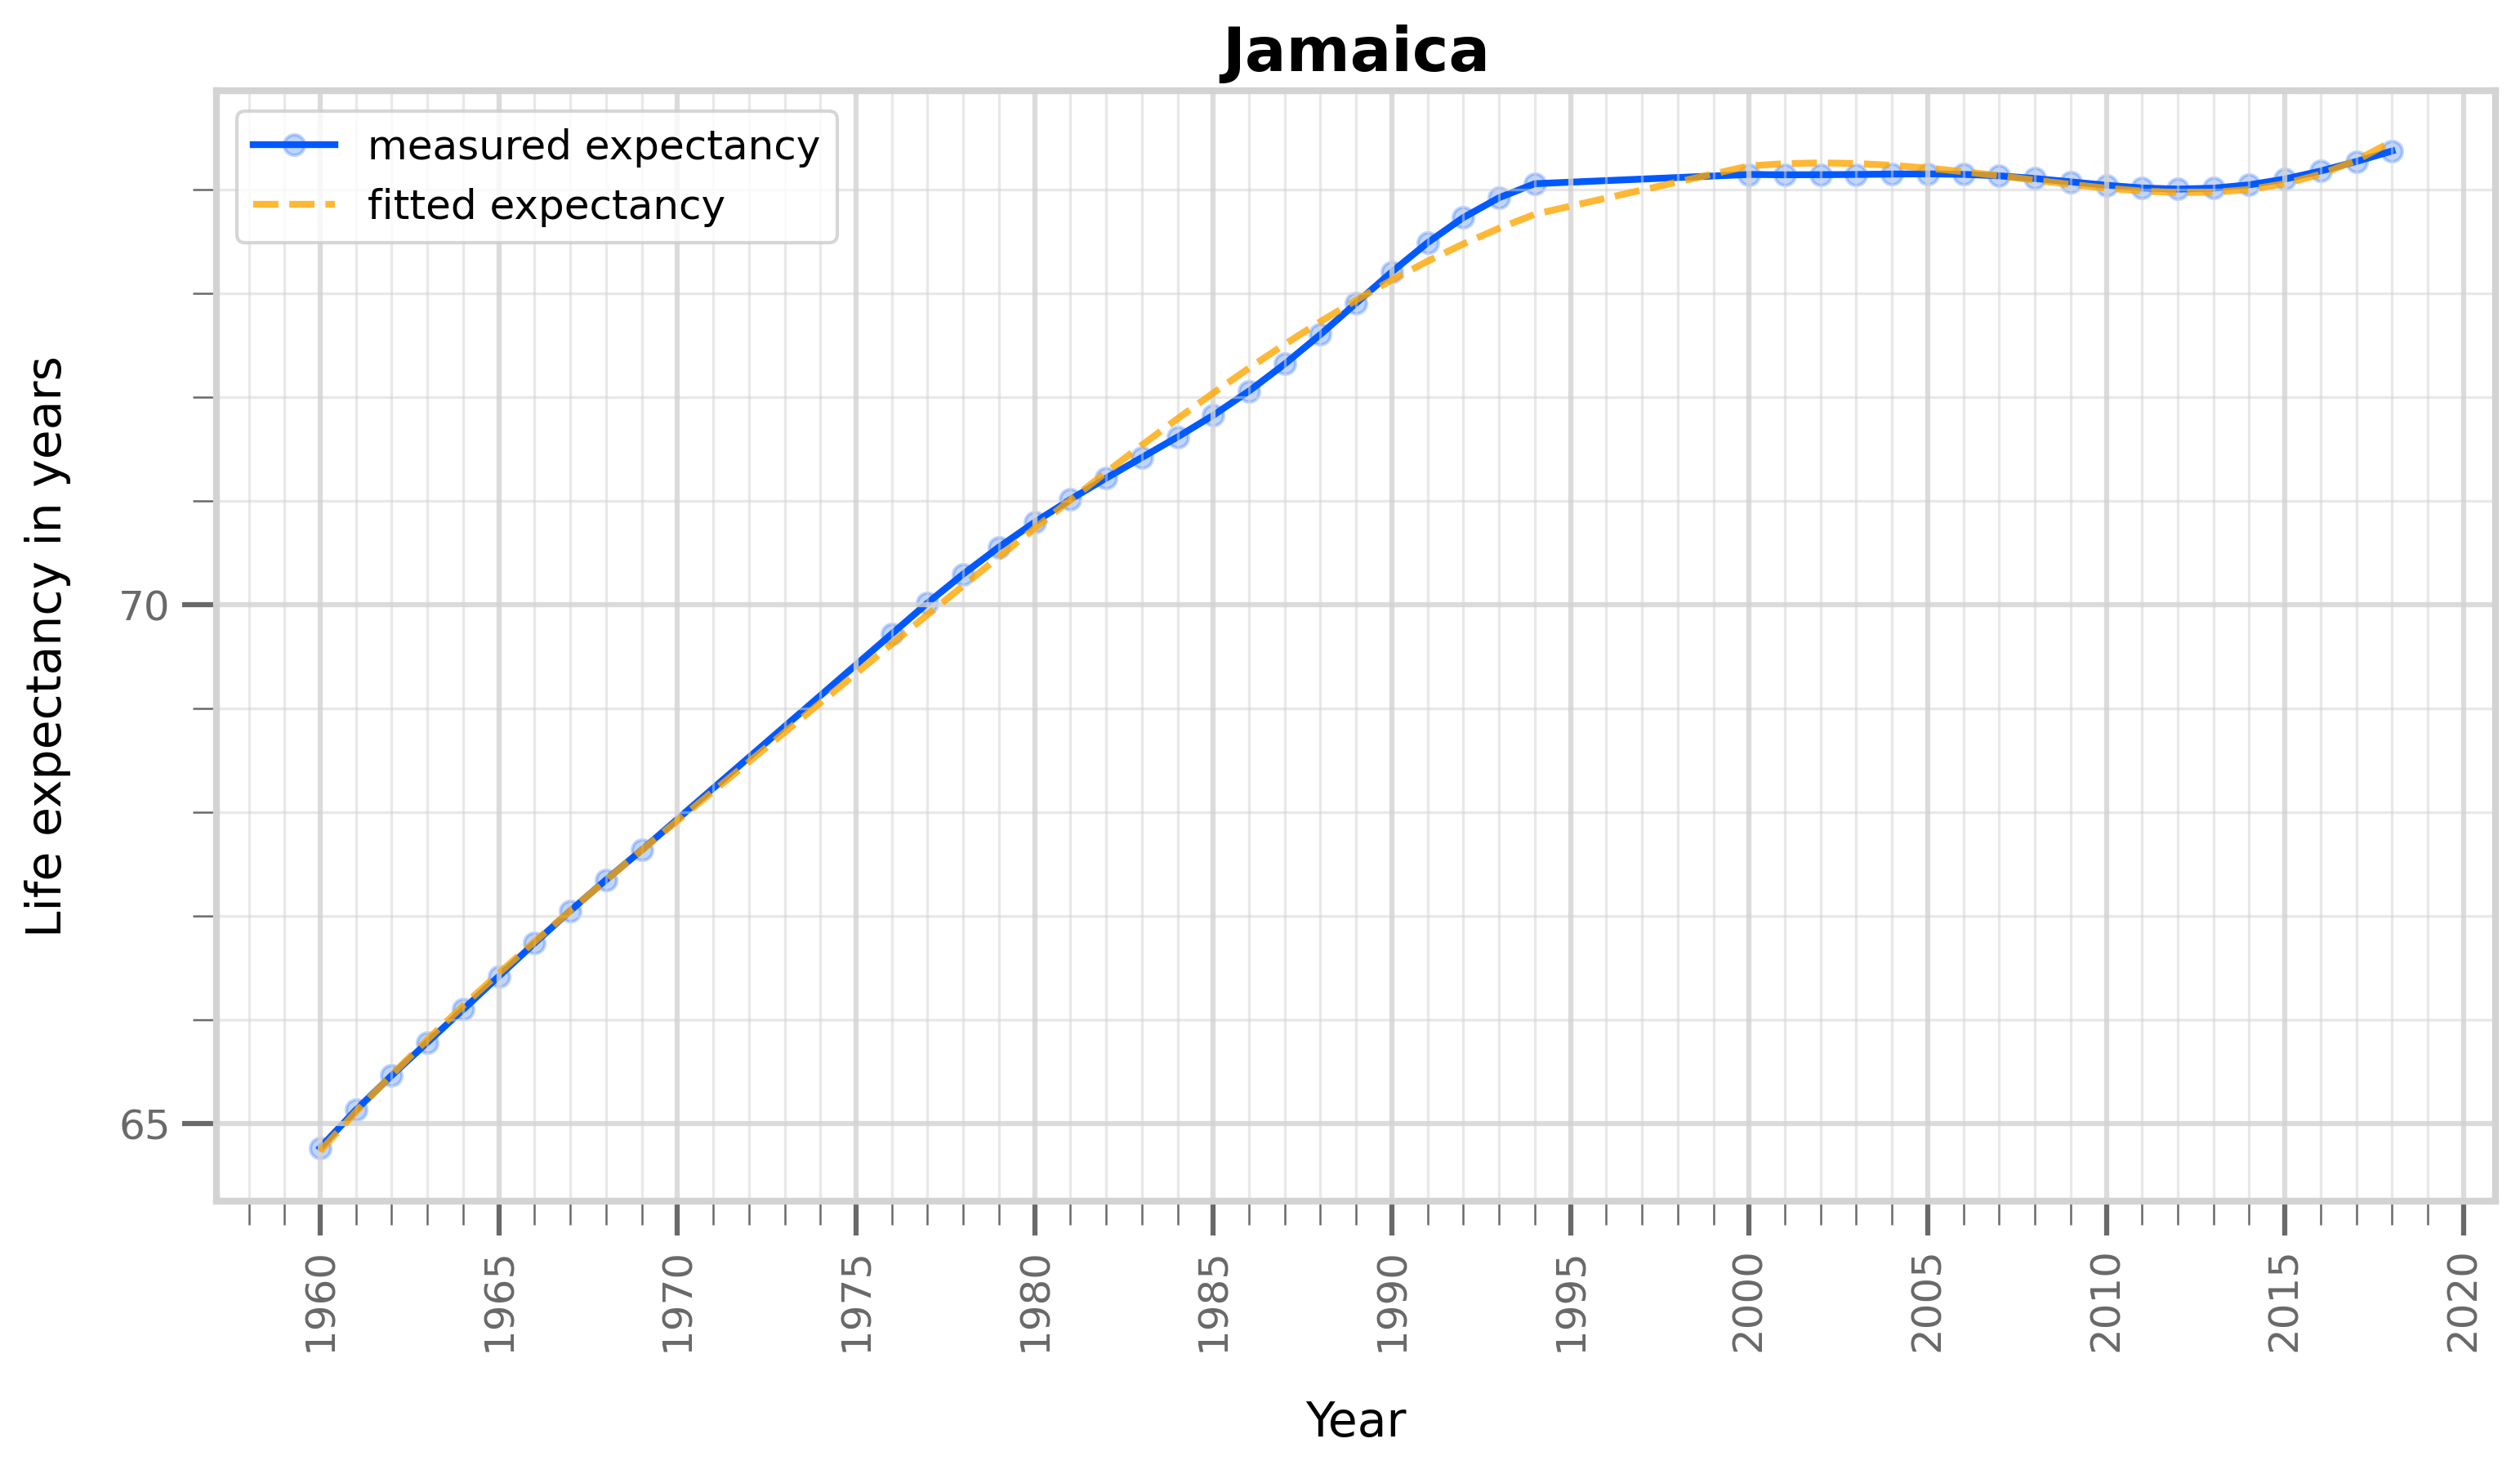

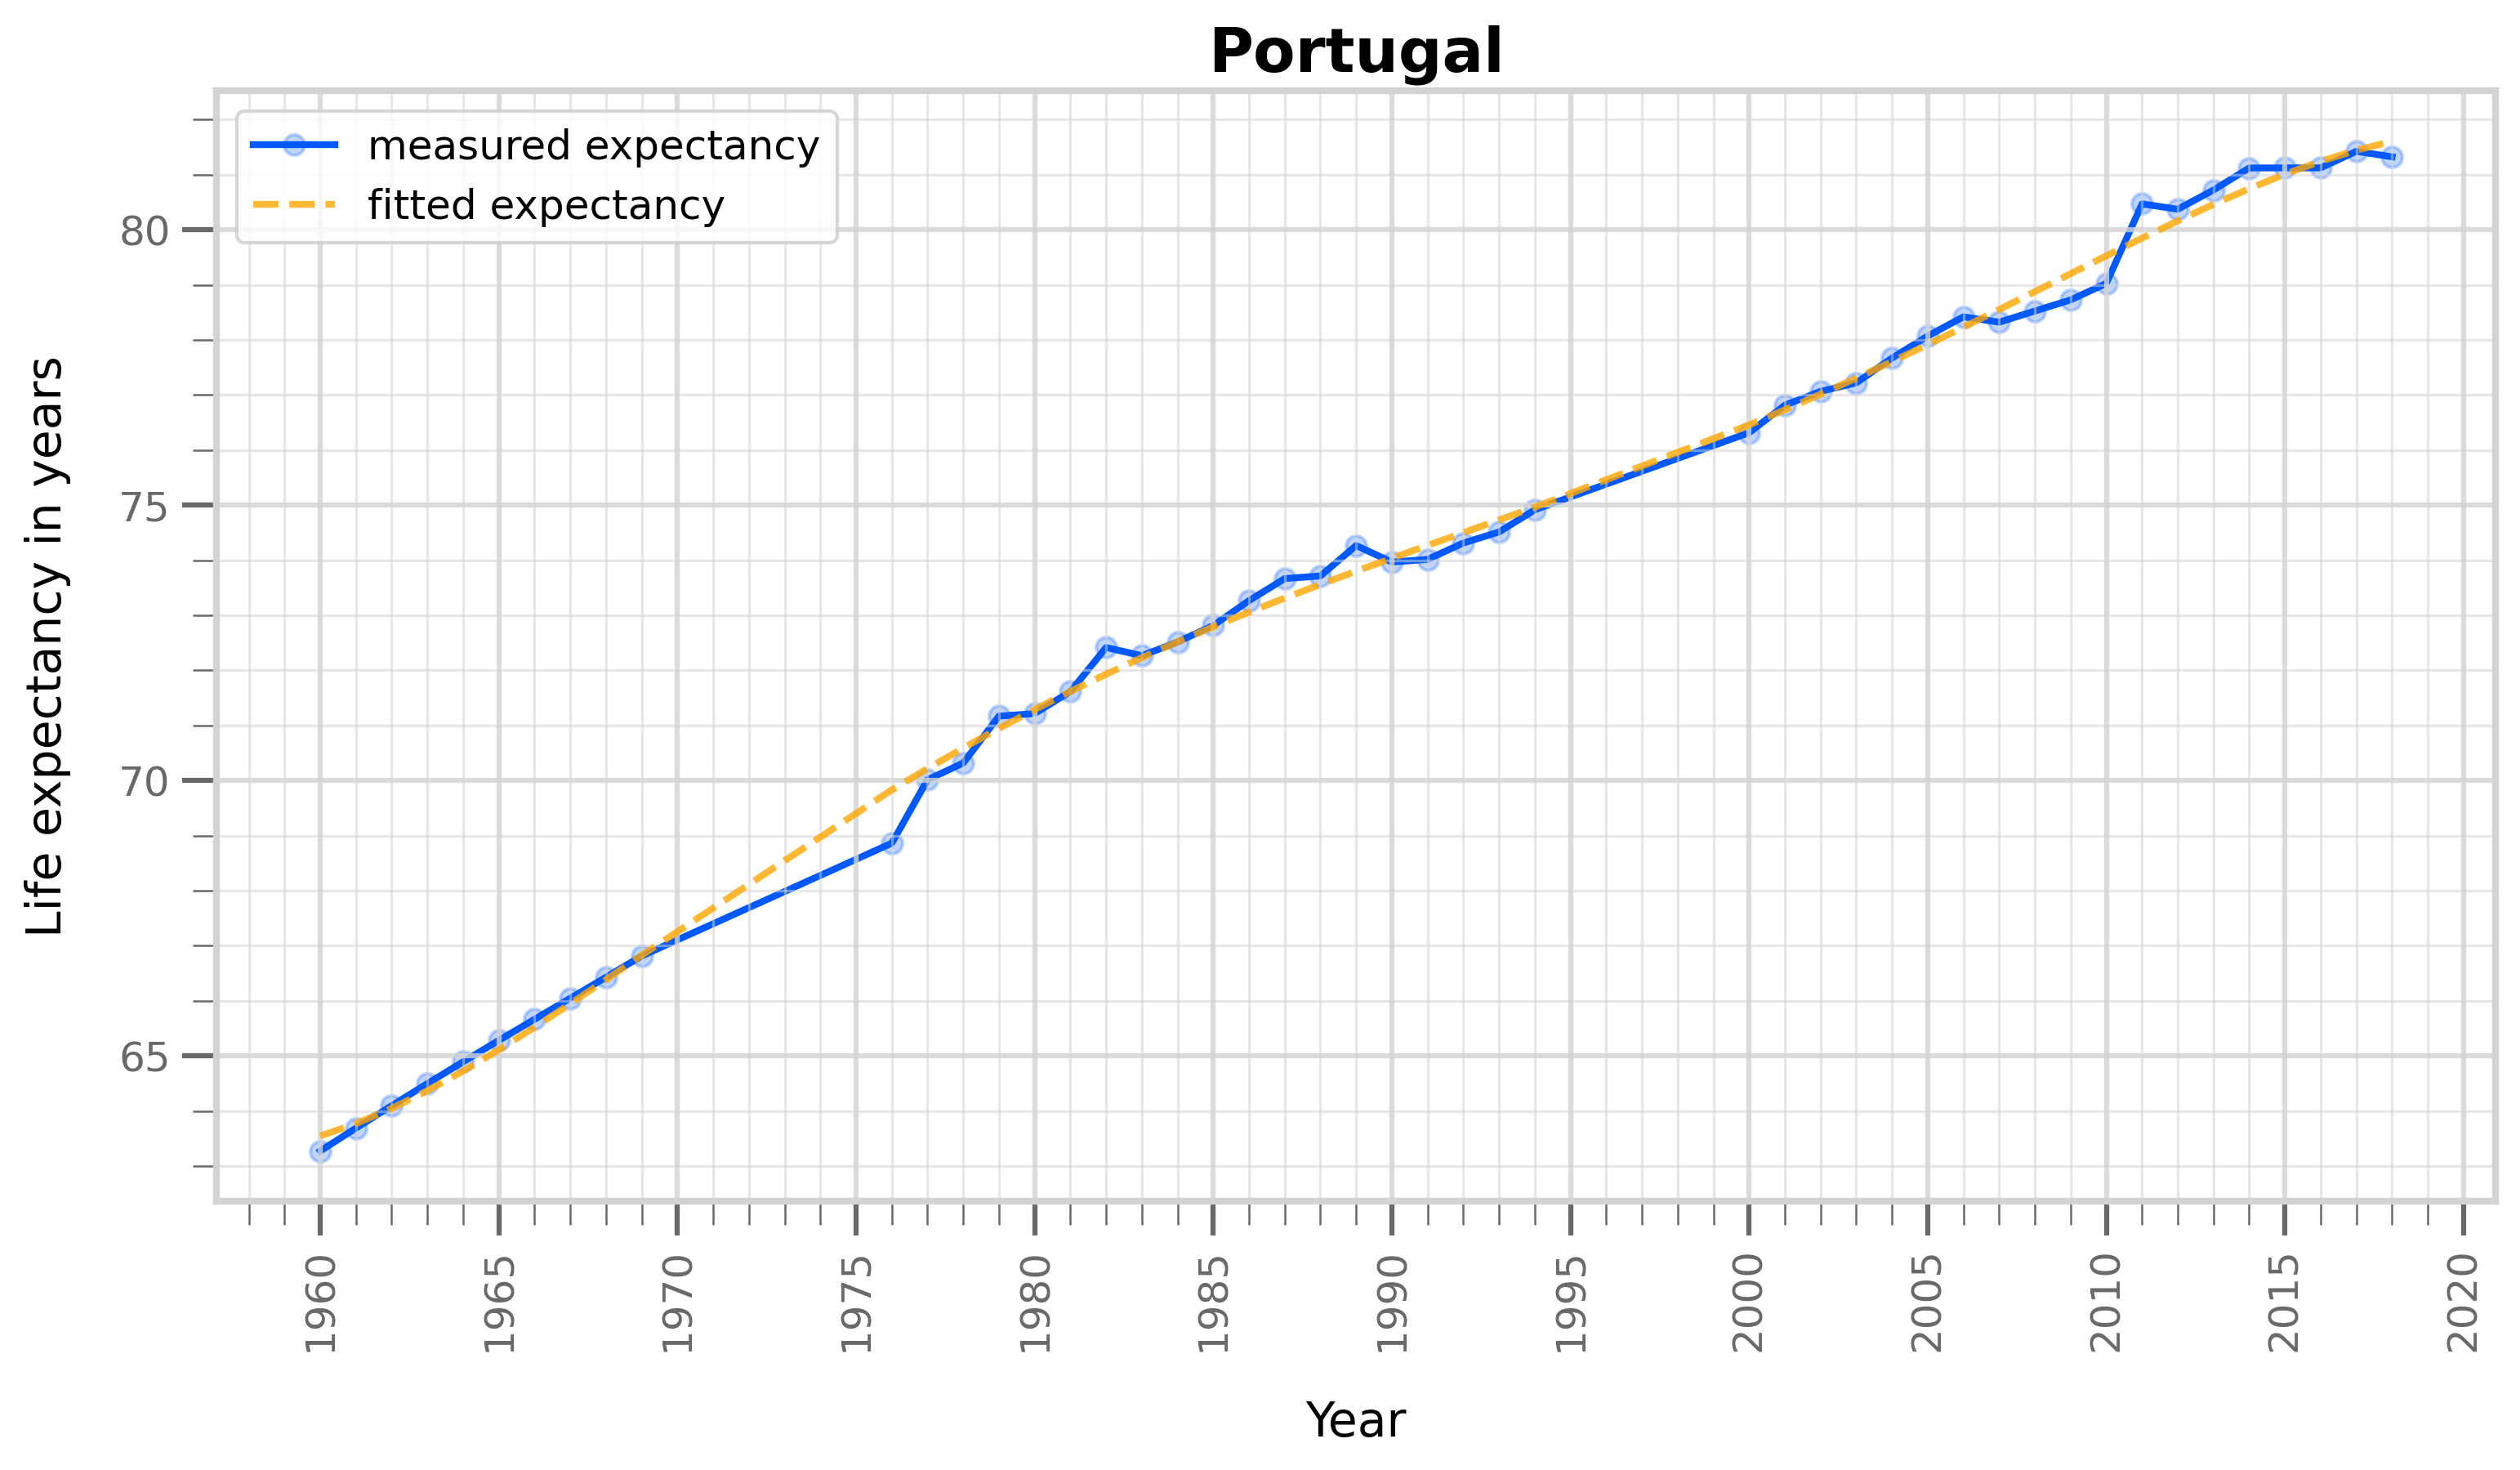

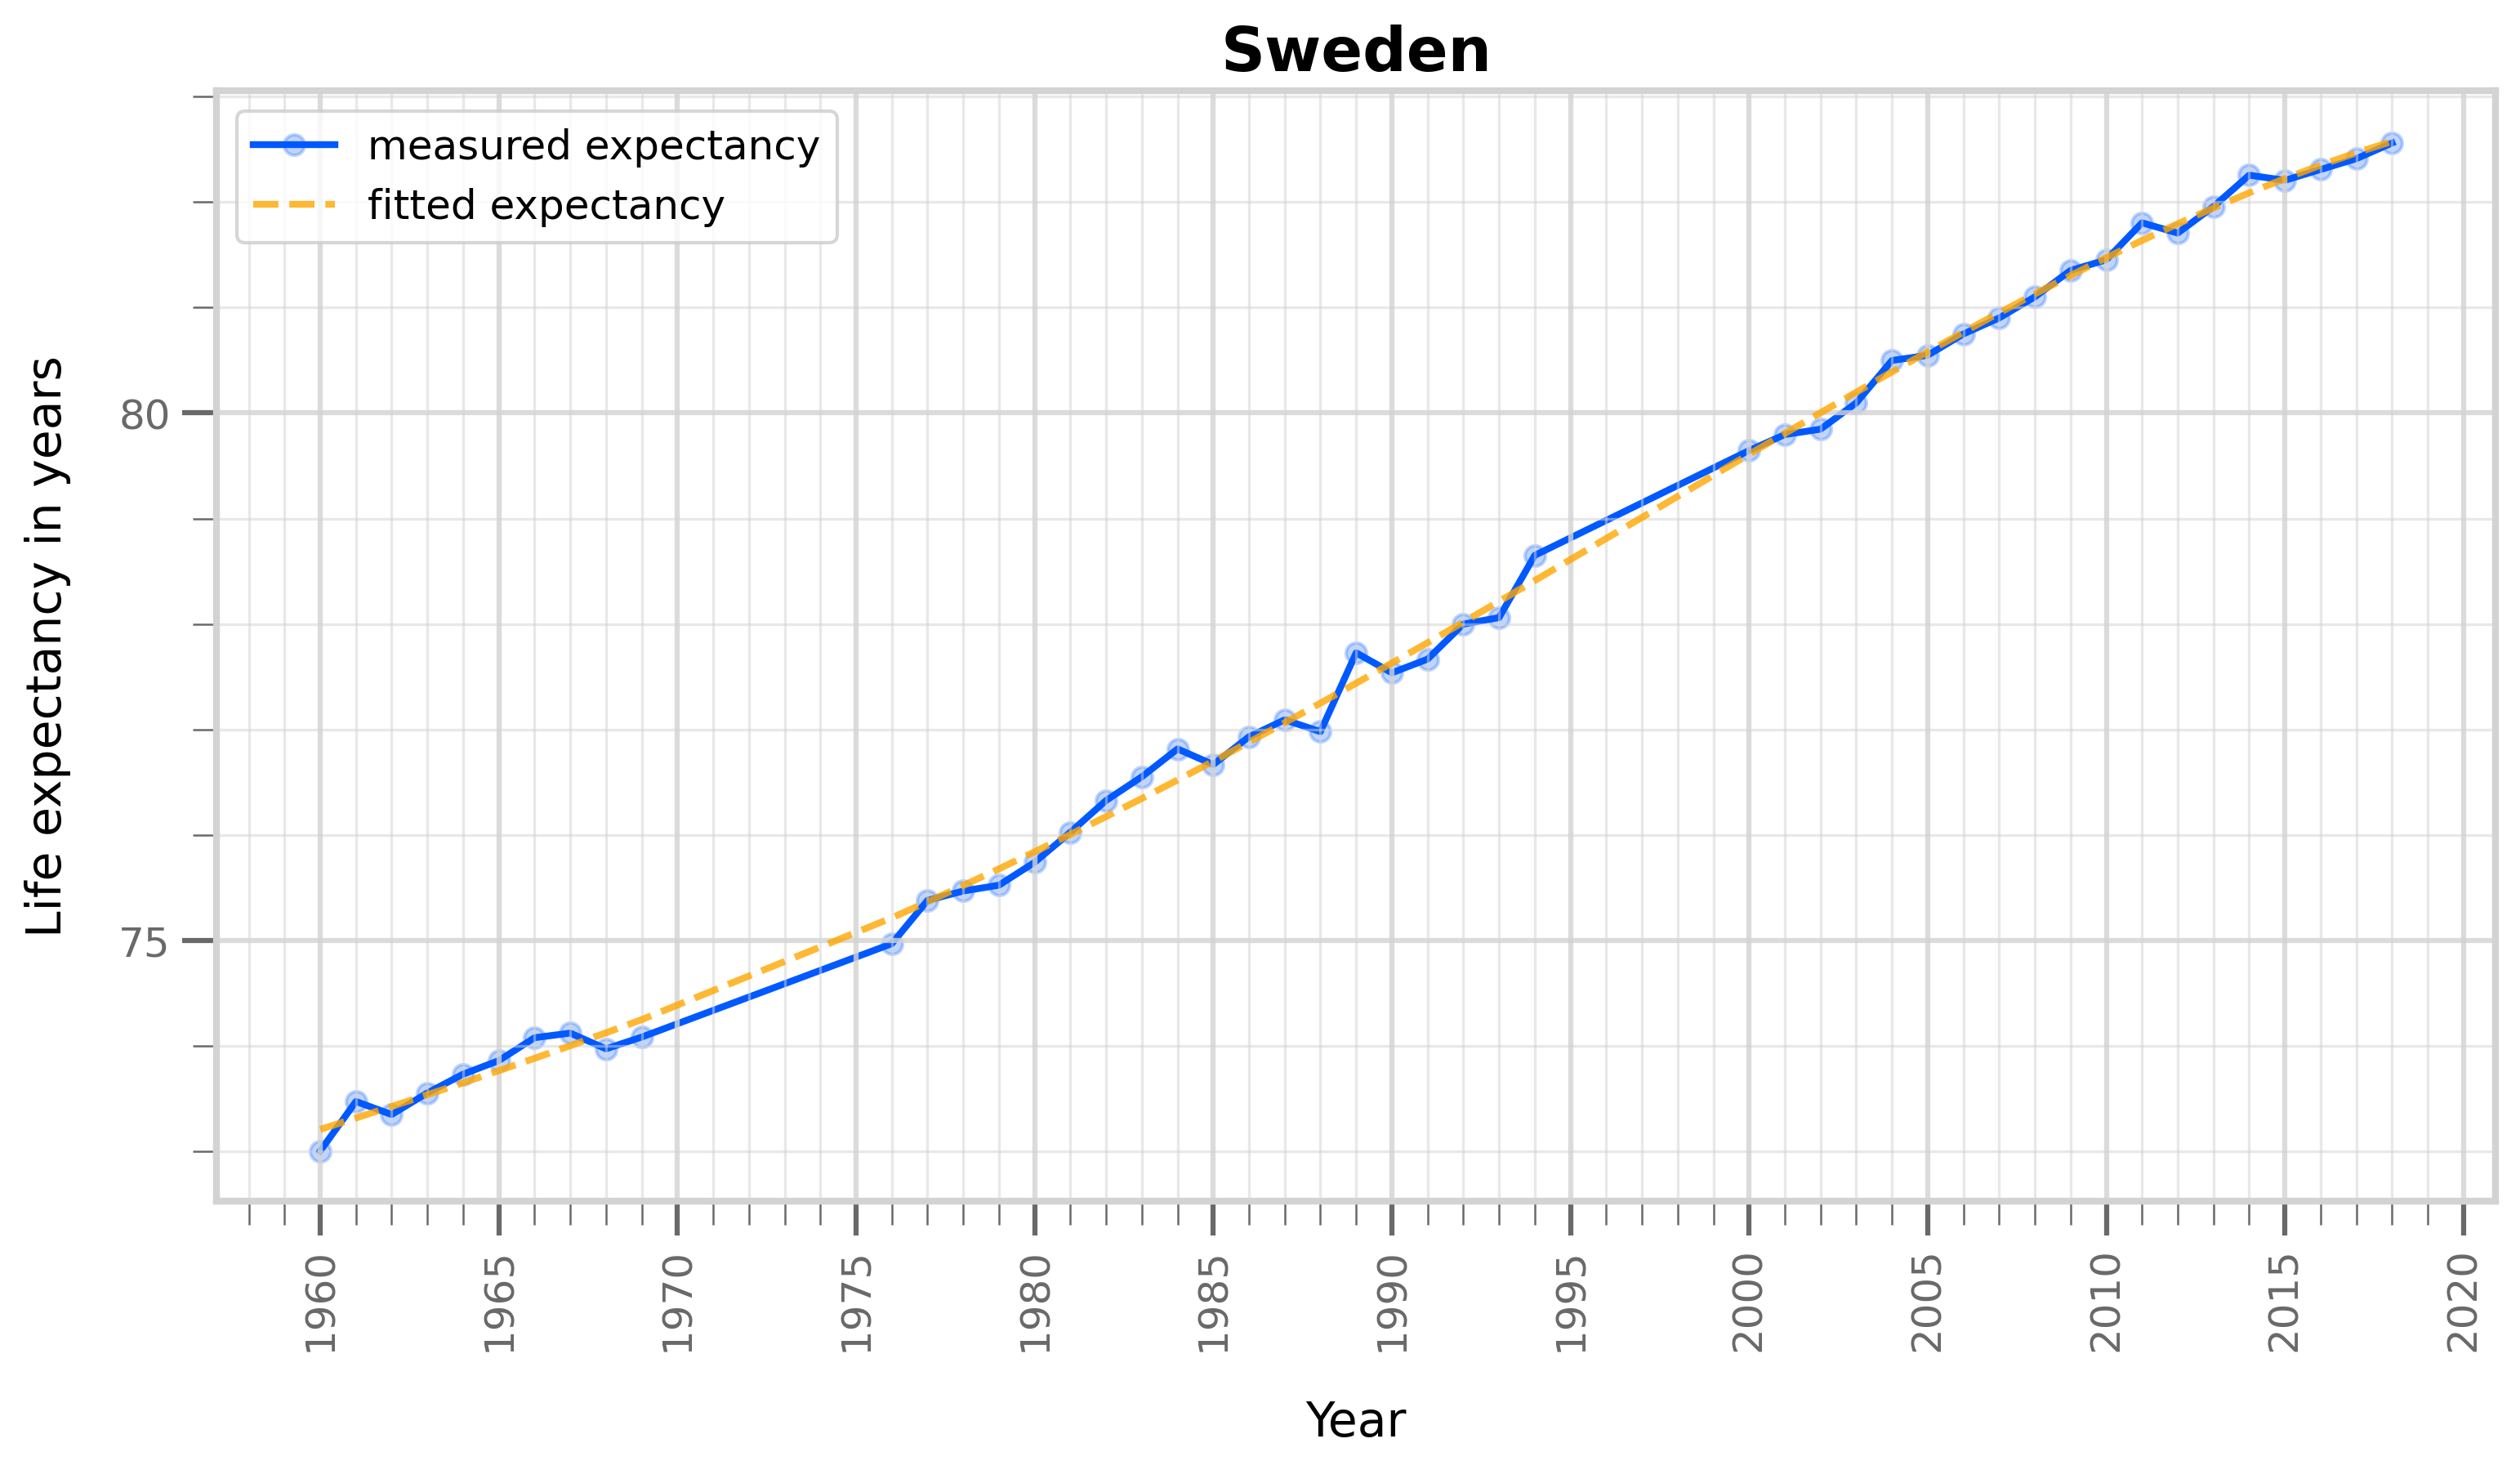

In [2]:
def plot_overlain_data(title, x_values, y1_values, y2_values,
                       x_label, y_label, y1_legend, y2_legend):
    plt.rc('axes', edgecolor="lightgray", linewidth=2)
    plt.figure(dpi=300, figsize=(12, 6))

    plt.grid(which='major', alpha=0.8, color='lightgray', linestyle='-', linewidth=1.5)
    plt.grid(which='minor', alpha=0.5, color='lightgray', linestyle='-')
    plt.grid(True)

    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(x_label, fontsize=14, labelpad=14)
    plt.ylabel(y_label, fontsize=14, labelpad=14)

    plt.tick_params(axis='both', colors='dimgray', labelsize=12, length=10, width=1.5)
    plt.xticks(np.arange(min(x_values), max(x_values) + 5, 5), rotation='90')
    plt.yticks(np.arange(0, 100, 5))

    plt.tick_params(which='minor', color='dimgray', length=7)
    plt.minorticks_on()

    # color format: (red, green, blue, transparency)
    plt.plot(x_values, y1_values, color=(0, 0.35, 1, 1), label=y1_legend,
             linewidth=2, marker="o", markerfacecolor=(0, 0.35, 1, 0.25), zorder=1)
    plt.plot(x_values, y2_values, color=(1, 0.65, 0, 1), label=y2_legend,
             alpha=0.8, linewidth=2, linestyle="--", zorder=2)

    plt.legend(loc='upper left', fontsize=12)

    plt.show()


def data_frame_row_values(data_frame: pd.DataFrame, column_name: str):
    lists_of_row_values = []  # list of lists

    for index in range(len(data_frame)):
        row = data_frame.iloc[index]

        lists_of_row_values.append(
            row.loc[column_name:].values.tolist()  # from given column to end of row
        )

    return lists_of_row_values


def polynomially_fitted_values(x_values, lists_of_y_values, degree):
    lists_of_fitted_y_values = []  # list of lists

    for y_values in lists_of_y_values:
        coefficients = np.polyfit(x_values, y_values, degree)
        polynomial   = np.poly1d(coefficients)

        lists_of_fitted_y_values.append(
            polynomial(x_values).tolist()
        )

    return lists_of_fitted_y_values


# suppress later warnings about fit quality
warnings.simplefilter('ignore', np.RankWarning)

# years from 1960 to 2018. without 1970 to 1975 and 1995 to 1999.
years = list(range(1960, 1970)) + list(range(1976, 1995)) + list(range(2000, 2019))

random_countries             = data_frame.sample(5)
lists_of_expectancies        = data_frame_row_values(random_countries, "1960")
lists_of_fitted_expectancies = polynomially_fitted_values(years, lists_of_expectancies, 6)

for index in range(len(random_countries)):
    plot_overlain_data(
        random_countries.iloc[index].loc["Country_Name"],
        years, lists_of_expectancies[index], lists_of_fitted_expectancies[index],
        "Year", "Life expectancy in years", "measured expectancy", "fitted expectancy"
    )
    

### Task 3
**Goal**: Interpolate the life expectancy, of the previously taken country samples' 
missing years, via Numpy. Subsequently plot five graphs which overlay the interpolated 
life expectancy data with the original life expectancy data.